In [1]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Sylvia Tao\\Downloads\\100 shoe models.csv')

In [2]:
# Map text values to numerical values
waterproof_map = {'Low': 1, 'Medium': 2, 'High': 3}
comfortability_map = {'Low': 1, 'Medium': 2, 'High': 3}

df['Waterproof Level'] = df['Waterproof Level'].map(waterproof_map)
df['Comfortability Level'] = df['Comfortability Level'].map(comfortability_map)

# Display the processed dataframe
df.head()


,Unnamed: 0,Price,Gender,Brand,Usage,Material,Feet Length/Size,Customer Review,Waterproof Level,Comfortability Level
0,0,70.98,Unisex,Puma,Running,Synthetic,9,4.5,2,1
1,1,156.61,Male,Under Armour,Hiking,Leather,11,4.9,1,1
2,2,172.56,Unisex,New Balance,Casual,Suede,7,5.0,2,3
3,3,129.61,Unisex,New Balance,Hiking,Leather,10,4.5,3,3
4,4,88.83,Female,Adidas,Running,Suede,6,1.6,1,2


In [3]:
filtered_df = pd.DataFrame(columns=(['Price','Customer Review', 'Waterproof Level','Comfortability Level']))
# Normalize columns
for column in ['Price', 'Customer Review', 'Waterproof Level', 'Comfortability Level']:
    max_value = df[column].max()
    min_value = df[column].min()
    filtered_df[column] = (filtered_df[column] - min_value) / (max_value - min_value)

In [4]:
import numpy as np

def get_recommendations(df, max_price, usage, weights, num_simulations=1000):
    # Filter the dataset based on the max price and usage
    filtered_df = df[(df['Price'] <= max_price) & (df['Usage'] == usage)]

    # Normalize columns
    for column in ['Price', 'Customer Review', 'Waterproof Level', 'Comfortability Level']:
        max_value = df[column].max()
        min_value = df[column].min()
        filtered_df[column] = (filtered_df[column] - min_value) / (max_value - min_value)

    # Initialize a column for the Monte Carlo scores
    filtered_df['Monte Carlo Score'] = 0

    # Monte Carlo Simulation
    for _ in range(num_simulations):
        # Simulating random variation in weights
        simulated_weights = {k: np.random.uniform(0.9 * v, 1.1 * v) for k, v in weights.items()}

        # Calculate utility score for each simulation
        simulated_score = (
            (1 - filtered_df['Price']) * simulated_weights['price'] +
            filtered_df['Customer Review'] * simulated_weights['review'] +
            filtered_df['Waterproof Level'] * simulated_weights['waterproof'] +
            filtered_df['Comfortability Level'] * simulated_weights['comfortability']
        )

        filtered_df['Monte Carlo Score'] += simulated_score

    # Average the scores over all simulations
    filtered_df['Monte Carlo Score'] /= num_simulations

    # Sort by Monte Carlo Score
    recommended_df = filtered_df.sort_values(by='Monte Carlo Score', ascending=False)

    return recommended_df

In [5]:
# Extract unique usage categories from the dataset
unique_usages = df['Usage'].unique().tolist()

import tkinter as tk
from tkinter import ttk

# Function to handle the recommendation request
def handle_recommendation():
    max_price = float(max_price_entry.get())
    usage = usage_combobox.get()
    weights = {
        'price': price_scale.get(),
        'review': review_scale.get(),
        'waterproof': waterproof_scale.get(),
        'comfortability': comfortability_scale.get()
    }
    recommendations = get_recommendations(df, max_price, usage, weights)
    recommendation_text.set(recommendations.to_string())

# Setup the main window
root = tk.Tk()
root.title("Shoe Recommendation System")

# Max Price Entry
tk.Label(root, text="Max Price:").pack()
max_price_entry = tk.Entry(root)
max_price_entry.pack()

# Usage Dropdown
tk.Label(root, text="Usage:").pack()
usage_combobox = ttk.Combobox(root, values=unique_usages)
usage_combobox.pack()

# Sliders for attribute weights
tk.Label(root, text="Adjust Attribute Weights:").pack()

tk.Label(root, text="Price Weight:").pack()
price_scale = tk.Scale(root, from_=0, to=1, resolution=0.1, orient=tk.HORIZONTAL)
price_scale.pack()

tk.Label(root, text="Review Weight:").pack()
review_scale = tk.Scale(root, from_=0, to=1, resolution=0.1, orient=tk.HORIZONTAL)
review_scale.pack()

tk.Label(root, text="Waterproof Weight:").pack()
waterproof_scale = tk.Scale(root, from_=0, to=1, resolution=0.1, orient=tk.HORIZONTAL)
waterproof_scale.pack()

tk.Label(root, text="Comfortability Weight:").pack()
comfortability_scale = tk.Scale(root, from_=0, to=1, resolution=0.1, orient=tk.HORIZONTAL)
comfortability_scale.pack()

# Recommendation Button
recommend_button = tk.Button(root, text="Get Recommendations", command=handle_recommendation)
recommend_button.pack()

# Recommendation Output
recommendation_text = tk.StringVar()
recommendation_label = tk.Label(root, textvariable=recommendation_text, justify=tk.LEFT)
recommendation_label.pack()

# Run the application
root.mainloop()

C:\Users\Sylvia Tao\AppData\Local\Temp\ipykernel_24936\1079751049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column] = (filtered_df[column] - min_value) / (max_value - min_value)
C:\Users\Sylvia Tao\AppData\Local\Temp\ipykernel_24936\1079751049.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Monte Carlo Score'] = 0
C:\Users\Sylvia Tao\AppData\Local\Temp\ipykernel_24936\1079751049.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

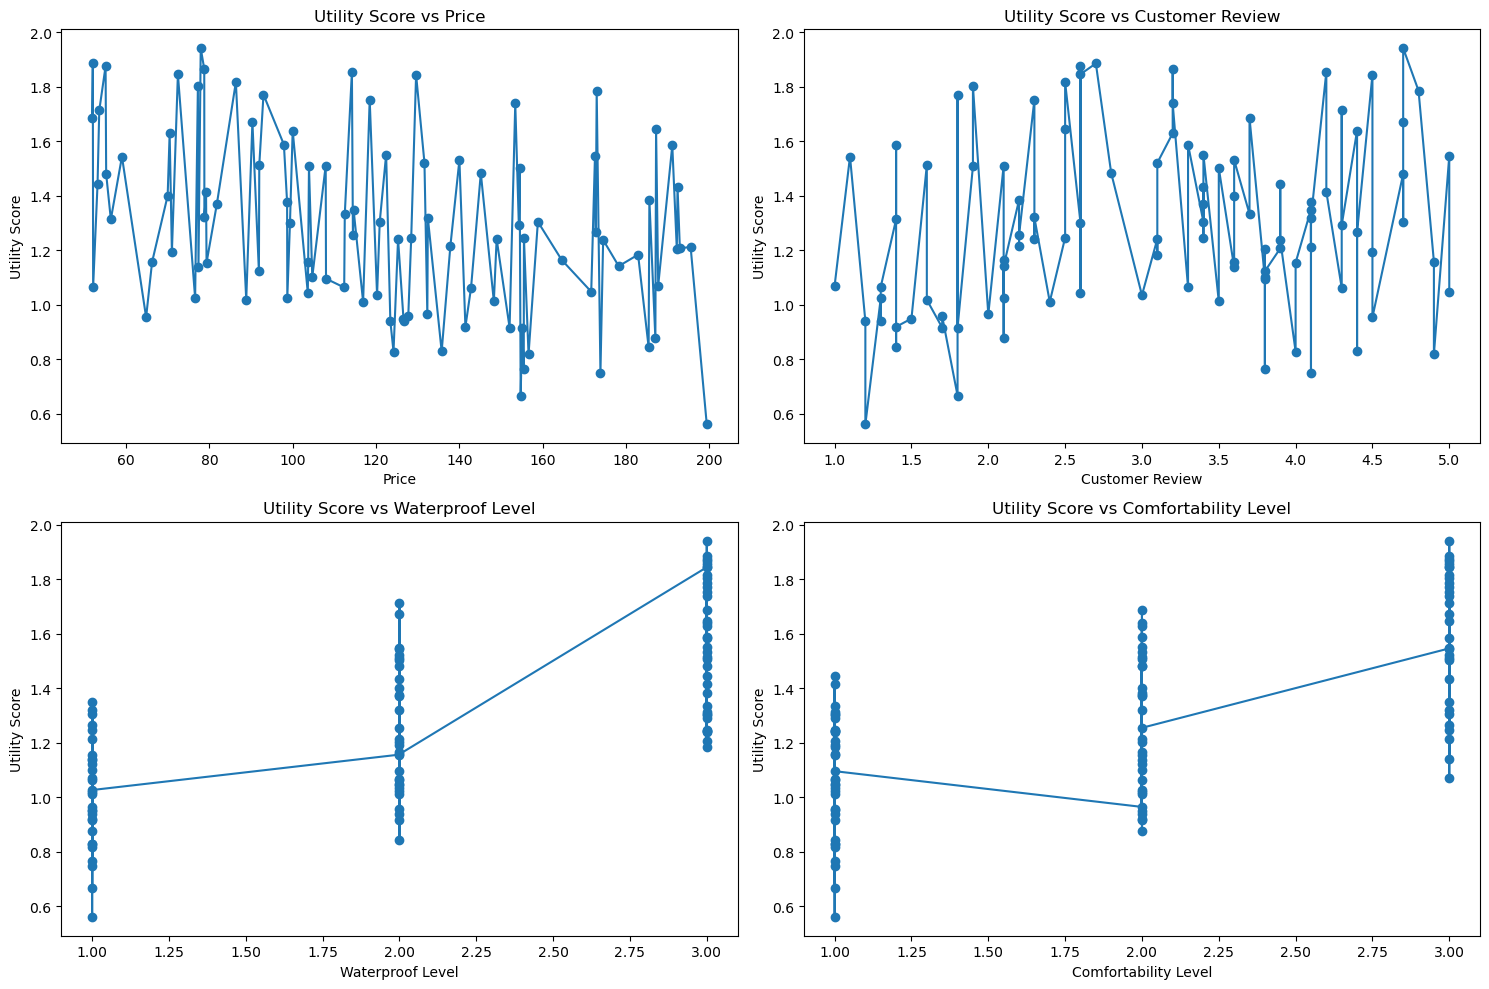

In [28]:
# Generating line graphs for each factor

# Function to create line graphs
def create_line_graph(x, y, x_label, title, ax):
    # Sorting data for line graph
    sorted_data = pd.DataFrame({x_label: x, 'Utility': y}).sort_values(by=x_label)
    ax.plot(sorted_data[x_label], sorted_data['Utility'], marker='o')
    ax.set_xlabel(x_label)
    ax.set_ylabel('Utility Score')
    ax.set_title(title)

# Create line graphs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

create_line_graph(df['Price'], df['Utility'], 'Price', 'Utility Score vs Price', axs[0, 0])
create_line_graph(df['Customer Review'], df['Utility'], 'Customer Review', 'Utility Score vs Customer Review', axs[0, 1])
create_line_graph(df['Waterproof Level'], df['Utility'], 'Waterproof Level', 'Utility Score vs Waterproof Level', axs[1, 0])
create_line_graph(df['Comfortability Level'], df['Utility'], 'Comfortability Level', 'Utility Score vs Comfortability Level', axs[1, 1])

plt.tight_layout()
plt.show()
